# Example code for land use/land cover classification from satellite imagery

Michael Mommert, University of St. Gallen, 2023

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

with open('S2A_MSIL2A_20170613T101031_46_73_all_bands.npy', 'rb') as f:
    sen2 = np.load(f)

with open('S2A_MSIL2A_20170613T101031_46_73_esaworldcover.npy', 'rb') as f:
    lulc = np.load(f)[0]

# extract rgb and scale for plotting
rgb = np.dstack([sen2[3], sen2[2], sen2[1]])
rgb = rgb/np.max(rgb)


plot satellite image and lulc map (using ESA Worldcover colormap)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


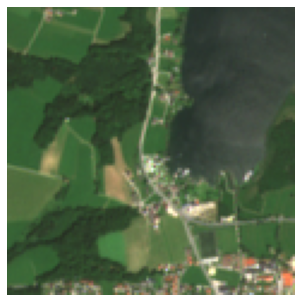

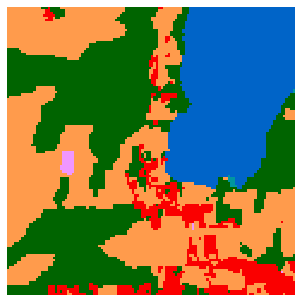

In [4]:
# plot satellite image
f, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.imshow(0.1+1.3*rgb)
plt.subplots_adjust(0, 0, 1, 1, 0, 0)
ax.get_yaxis().set_visible(False) 
ax.get_xaxis().set_visible(False) 
plt.axis('off')
plt.savefig('s2.png', pad_inches=0)
    

# define colormap from https://esa-worldcover.s3.eu-central-1.amazonaws.com/v200/2021/docs/WorldCover_PUM_V2.0.pdf
wc_labels = {
    10: "Tree cover",
    20: "Shrubland",
    30: "Grassland",
    40: "Cropland",
    50: "Built-up",
    60: "Bare/sparse vegetation",
    70: "Snow and Ice",
    80: "Permanent water bodies",
    90: "Herbaceous wetland",
    95: "Mangroves",
    100: "Moss and lichen",
}

colors = [
    [0,100,0],
    [0,100,0],
    [255,187,34],
    [255,187,34],
    [255,155,76],
    [255,155,76],
    [240,150,255],
    [240,150,255],
    [250,0,0],
    [250,0,0],
    [180,180,180],
    [180,180,180],
    [240,240,240],
    [240,240,240],
    [0,100,200],
    [0,100,200],
    [0,150,160],
    [0,150,160],
    [0,207,117],
    [250,230,160],
]

# normalize colors and define colormap
colors = np.array(colors) / 255
cmap = matplotlib.colors.ListedColormap(colors, name='esa_worldcover')

# plot lulc map
fig, ax = plt.subplots(1, 1, figsize=(4,4))
im = ax.imshow(lulc, interpolation="none", cmap=cmap, vmin=5, vmax=101)
plt.subplots_adjust(0, 0, 1, 1, 0, 0)
ax.get_yaxis().set_visible(False) 
ax.get_xaxis().set_visible(False) 
plt.axis('off')
plt.savefig('lulc.png', pad_inches=0)

## Thresholding

### Thresholding based on single bands

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


" # write results to file\nf, ax = plt.subplots(1, 1, figsize=(4, 4))\nax.imshow(r_filter)\nplt.subplots_adjust(0, 0, 1, 1, 0, 0)\nax.get_yaxis().set_visible(False) \nax.get_xaxis().set_visible(False) \nplt.axis('off')\nplt.savefig('r_filter.png', pad_inches=0) "

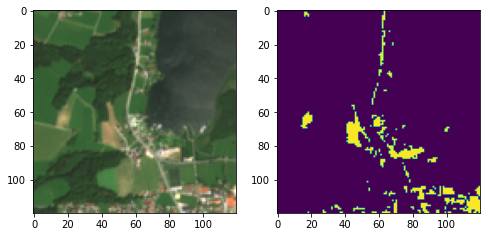

In [5]:
r_filter = np.zeros_like(sen2[3])
# only select those pixels with a g value greater than a given value
r_filter[sen2[3] > 1100] = 1

# plot results
f, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(0.1+1.3*rgb)
ax[1].imshow(r_filter)


""" # write results to file
f, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.imshow(r_filter)
plt.subplots_adjust(0, 0, 1, 1, 0, 0)
ax.get_yaxis().set_visible(False) 
ax.get_xaxis().set_visible(False) 
plt.axis('off')
plt.savefig('r_filter.png', pad_inches=0) """

### Thresholding based on multiple bands

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


" # write results to file\nf, ax = plt.subplots(1, 1, figsize=(4, 4))\nax.imshow(veg)\nplt.subplots_adjust(0, 0, 1, 1, 0, 0)\nax.get_yaxis().set_visible(False) \nax.get_xaxis().set_visible(False) \nplt.axis('off')\nplt.savefig('veg_ndvi.png', pad_inches=0)\n            \nf, ax = plt.subplots(1, 1, figsize=(4, 4))\nax.imshow(water)\nplt.subplots_adjust(0, 0, 1, 1, 0, 0)\nax.get_yaxis().set_visible(False) \nax.get_xaxis().set_visible(False) \nplt.axis('off')\nplt.savefig('water_ndwi.png', pad_inches=0) "

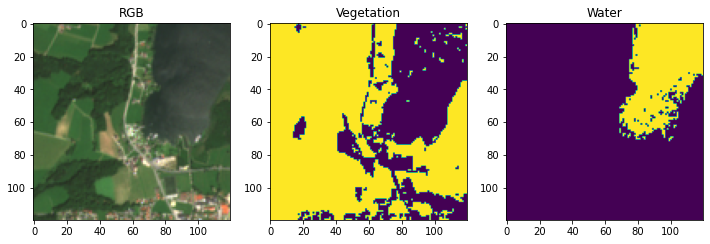

In [7]:
r,g,b,nir = sen2[3], sen2[2], sen2[1], sen2[8]

# define vegetation and water index
ndvi = (nir - r)/(nir + r)
ndwi = (nir - g)/(nir + g)

# apply thresholding
veg = np.zeros_like(ndvi)
veg[ndvi > 0.6] = 1

water = np.zeros_like(ndwi)
water[ndwi > 0.89] = 1

# plot results
f, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(0.1+1.3*rgb)
ax[0].set_title('RGB')
ax[1].imshow(veg)
ax[1].set_title('Vegetation')
ax[2].imshow(water)
ax[2].set_title('Water')


""" # write results to file
f, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.imshow(veg)
plt.subplots_adjust(0, 0, 1, 1, 0, 0)
ax.get_yaxis().set_visible(False) 
ax.get_xaxis().set_visible(False) 
plt.axis('off')
plt.savefig('veg_ndvi.png', pad_inches=0)
            
f, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.imshow(water)
plt.subplots_adjust(0, 0, 1, 1, 0, 0)
ax.get_yaxis().set_visible(False) 
ax.get_xaxis().set_visible(False) 
plt.axis('off')
plt.savefig('water_ndwi.png', pad_inches=0) """


## Clustering

### k-Means examples

generate some random data

In [8]:
import numpy as np
from numpy.random import multivariate_normal, seed

n = 50 # sample size per cluster 

# set random seed
seed(42)

x = np.vstack(
    [multivariate_normal((0, 1), [[0.07, 0], [0, 0.07]], size=n),
     multivariate_normal((1, 1), [[0.07, 0], [0, 0.07]], size=n), 
     multivariate_normal((1, 0), [[0.07, 0], [0, 0.07]], size=n)])
y = np.array([0] * n + [1] * n + [2] * n)

plot distribution

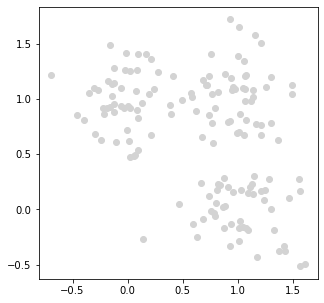

In [9]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(x[:,0], x[:,1], color='lightgray')

plt.savefig('kmeans_setup.png', dpi=150)

initialization: pick random centroids, plot

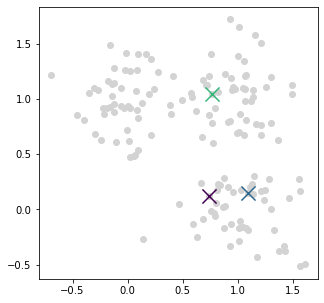

In [10]:
k = 3
center_ids = np.random.randint(low=0, high=len(x), size=k)

f, ax = plt.subplots(1, 1, figsize=(5, 5))
colors = ['gray'] * len(x)

# plot all datapoints
ax.scatter(x[:,0], x[:,1], color='lightgray')

# indicate cluster centers
for i, c in enumerate(center_ids):
    ax.scatter(x[:,0][c], x[:,1][c], s=200, marker='x', vmin=0, vmax=k, c=i)

plt.savefig('kmeans_init.png', dpi=150)

compute distances and assign data points to clusters, plot

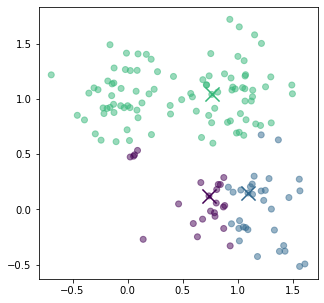

In [11]:
def compute_distances(x, cluster_centers):
    distances = []
    for cluster_center in cluster_centers:
        distances.append(np.sqrt((x[:,0] - cluster_center[0])**2 + (x[:,1] - cluster_center[1])**2))
    distances = np.dstack(distances)[0]

    # assign clusters based on distance
    clusters = np.argmin(distances, axis=1)
    return distances, clusters

dist, y_pred = compute_distances(x, x[center_ids])

f, ax = plt.subplots(1, 1, figsize=(5, 5))
colors = ['gray'] * len(x)

# plot all datapoints
ax.scatter(x[:,0], x[:,1], c=y_pred, vmin=0, vmax=k, alpha=0.5)

# indicate cluster centers
for i, c in enumerate(center_ids):
    ax.scatter(x[:,0][c], x[:,1][c], s=200, marker='x', vmin=0, vmax=k, c=i)

plt.savefig('cluster_assignment.png', dpi=150)

recompute centroids, plot

ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 150.

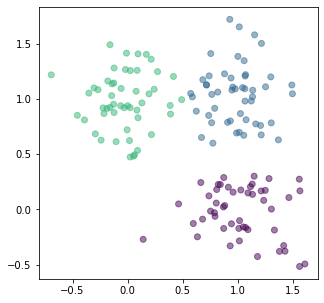

In [14]:
def update_cluster_centers(x, y_pred):
    k = len(set(y_pred))
    cluster_centers = []
    for i in range(k):
        cluster_centers.append((np.mean(x[y_pred == i, 0]),
                                np.mean(x[y_pred == i, 1])))
    return cluster_centers

cluster_centers = update_cluster_centers(x, y_pred)

f, ax = plt.subplots(1, 1, figsize=(5, 5))
colors = ['gray'] * len(x)

# plot all datapoints
ax.scatter(x[:,0], x[:,1], c=y_pred, vmin=0, vmax=k, alpha=0.5)

# indicate cluster centers
for j, c in enumerate(cluster_centers):
    ax.scatter(c[0], c[1], s=200, marker='x', c=j, vmin=0, vmax=k)

plt.savefig('kmeans_000.png', dpi=150)

repeat...

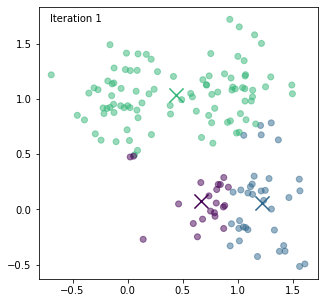

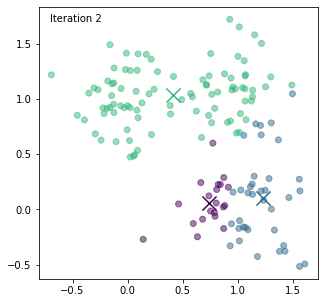

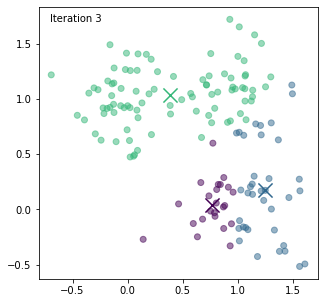

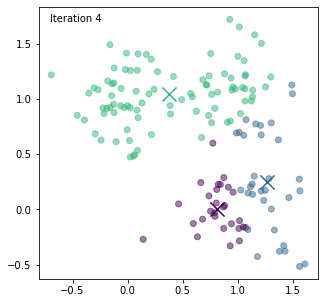

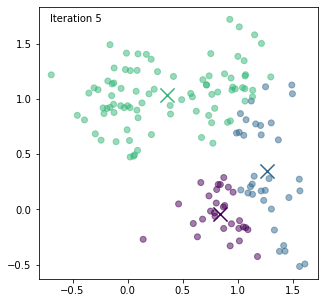

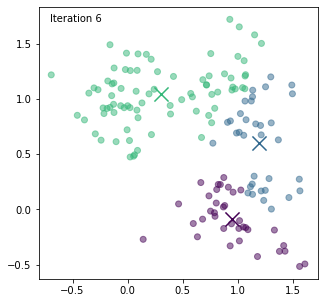

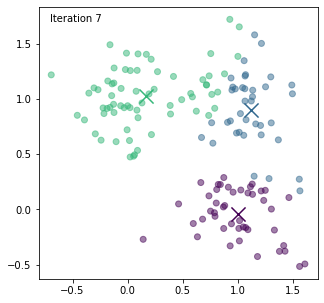

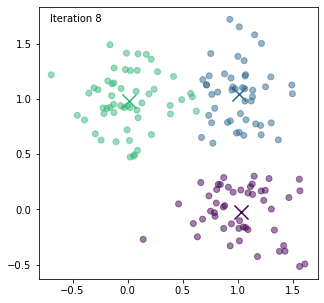

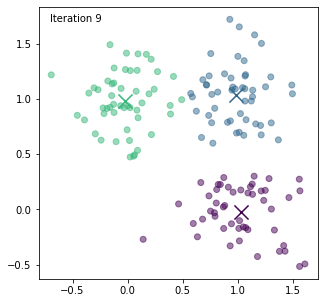

In [13]:
for i in range(1, 10):
    dist, y_pred = compute_distances(x, cluster_centers)
    cluster_centers = update_cluster_centers(x, y_pred)

    # setup axis for plot
    f, ax = plt.subplots(1, 1, figsize=(5, 5))
    
    # plot all datapoints
    ax.scatter(x[:,0], x[:,1], c=y_pred, vmin=0, vmax=k, alpha=0.5)

    # mark cluster centers
    for j, c in enumerate(cluster_centers):
        ax.scatter(c[0], c[1], s=200, marker='x', c=j, vmin=0, vmax=k)

    # add label to indicate iteration
    ax.annotate("Iteration {}".format(i), xy=(-0.7, 1.7))

    plt.savefig('kmeans_{:03d}.png'.format(i), dpi=150)

### Apply k-Means to satellite image data

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler

# extract R, G, B, NIR and reshape to Nx4
rgbnir = np.dstack([sen2[3], sen2[2], sen2[1], sen2[8]]).reshape(-1, 4)

# scale the data
scaler = RobustScaler()
rgbnir_scaled = scaler.fit_transform(rgbnir)

# perform k-Means
model = KMeans(n_clusters=3)
clusters = model.fit_predict(rgbnir_scaled)

# reshape cluster assignments to map
clusters_map = clusters.reshape(120, 120)


plot results

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


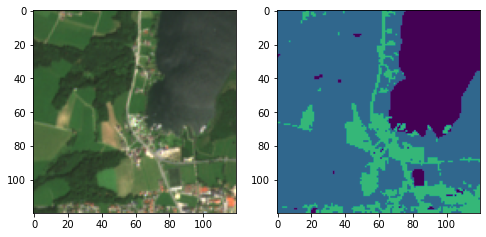

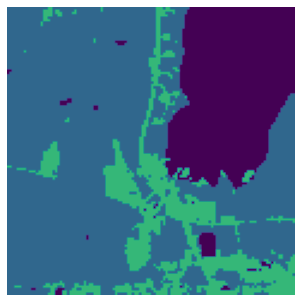

In [32]:
f, ax = plt.subplots(1, 2, figsize=(8, 4))

rgb = np.dstack([sen2[3], sen2[2], sen2[1]])
rgb = rgb/np.max(rgb)

ax[0].imshow(0.1+1.3*rgb)
ax[1].imshow(clusters_map, vmin=0, vmax=k)


f, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.imshow(clusters_map, vmin=0, vmax=k)
plt.subplots_adjust(0, 0, 1, 1, 0, 0)
ax.get_yaxis().set_visible(False) 
ax.get_xaxis().set_visible(False) 
plt.axis('off')
plt.savefig('kmeans_results_03.png', pad_inches=0)

generate segmentation masks for different k

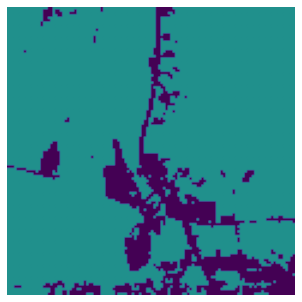

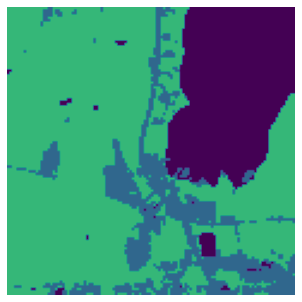

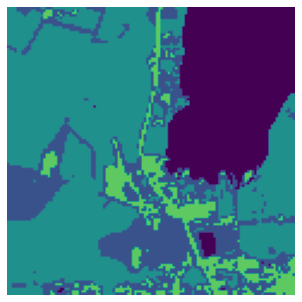

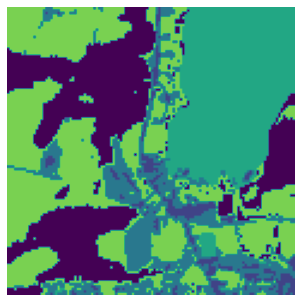

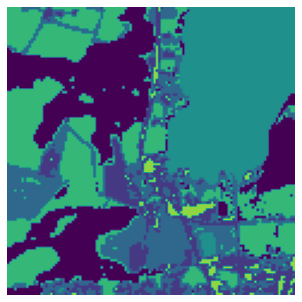

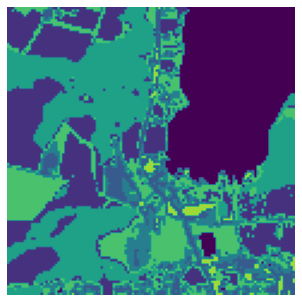

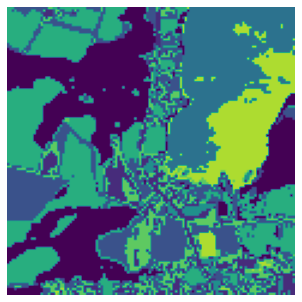

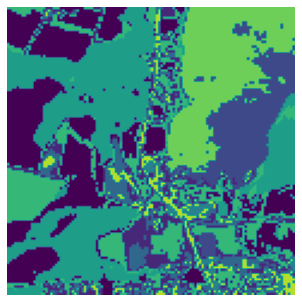

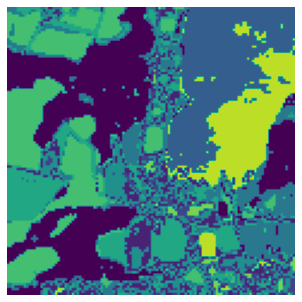

In [33]:
for k in range(2, 11):
    # perform k-Means
    model = KMeans(n_clusters=k)
    clusters = model.fit_predict(rgbnir_scaled)

    # reshape cluster assignments to map
    clusters_map = clusters.reshape(120, 120)

    f, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax.imshow(clusters_map, vmin=0, vmax=k)
    plt.subplots_adjust(0, 0, 1, 1, 0, 0)
    ax.get_yaxis().set_visible(False) 
    ax.get_xaxis().set_visible(False) 
    plt.axis('off')
    plt.savefig('kmeans_results_{:02d}.png'.format(k), pad_inches=0)

## U-Net

visualize prediction from a U-Net trained on S2 and ESA Worldcover

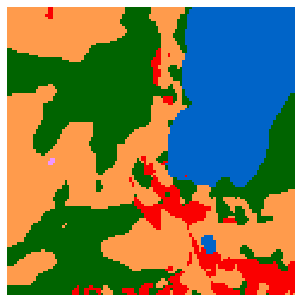

In [34]:
with open('unet_prediction.npy', 'rb') as f:
    unet_pred = np.load(f)[0]

# plot prediction
fig, ax = plt.subplots(1, 1, figsize=(4,4))
im = ax.imshow(unet_pred*10+10, interpolation="none", cmap=cmap, vmin=5, vmax=101)

plt.subplots_adjust(0, 0, 1, 1, 0, 0)

ax.get_yaxis().set_visible(False) 
ax.get_xaxis().set_visible(False) 
plt.axis('off')

plt.savefig('unet_pred.png', pad_inches=0)